# Stratified_GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Wine

In [9]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
# print(cancer.DESCR)

In [10]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

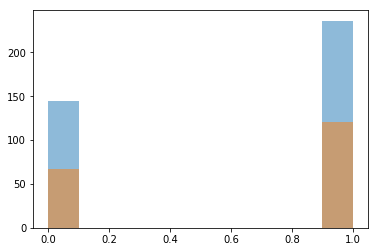

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [12]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True, scoring="roc_auc")

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 1, 'gamma': 0.001}

In [14]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [15]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

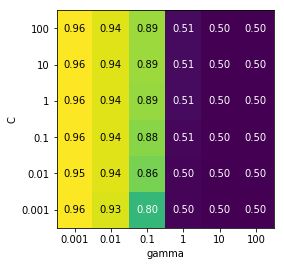

In [16]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [17]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_2 = GridSearchCV(SVC(kernel="linear"), param_grid, cv=kfold)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'C': 100}

In [20]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test, model.predict(X_test)) ))
    
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict(X_test)))

SVM rbf
precision_score: 0.9289007092198581
recall_score: 0.9202127659574468
f1_score: 0.9213394822345665
accuracy_score: 0.9202127659574468
roc_auc_score: 0.931355618601209
SVM linear
precision_score: 0.9473759901740529
recall_score: 0.9468085106382979
f1_score: 0.9469779933249897
accuracy_score: 0.9468085106382979
roc_auc_score: 0.9453558653015913


In [22]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'SVM linear'])
df

,Method,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
0,SVM rbf,0.920213,0.921339,0.928901,0.920213,0.931356
1,SVM linear,0.946809,0.946978,0.947376,0.946809,0.945356
